# Dimensionality Reduction With PCA - Toy Datasets

In this notebook we explore PCA analysis using toy datasets provided by scikit learn. 
It is a continuation of the previous notebook where we defined PCA and saw how it relates to the covariance matrix of our data. 

## Breast Cancer

The first dataset we examine is the 1995 [breast cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) set. 
It contains 569 samples with features originating from digitized images of breast mass. 
There are 30 features along with a label indicating if the sample was canerous. 
The featues include measurements such as:
- radius
- area
- concavity
- etc.


In [1]:
# Import packages that will be used
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
%matplotlib widget

In [2]:
bc = load_breast_cancer()

In [3]:
# Get samples and classification for each. 
X, y = bc.data, bc.target
print(X.shape, y.shape)

(569, 30) (569,)


In [4]:
# Mean-center the data and compute the covariance matrix
X = (X - X.mean(axis=0)) / X.std(axis=0)
C = np.cov(X, ddof=1, rowvar=False)

In [5]:
eigenvalues, eigenvectors = np.linalg.eig(C)

In [6]:
ordered = np.argsort(eigenvalues)[::-1] # reverse to have highest to lowest
sorted_eigenvalues = eigenvalues[ordered]
sorted_eigenvectors = eigenvectors[ordered]
print("Eigenvalues:", sorted_eigenvalues)

Eigenvalues: [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04]


In [7]:
explained_var = sorted_eigenvalues / np.sum(sorted_eigenvalues)
accum_explained_var = [explained_var[0]]
for i in range(1, len(explained_var)):
    accum_explained_var.append(accum_explained_var[i-1] + explained_var[i])

print("First 2 explained variance:", accum_explained_var[1])
print("First 3 explained variance:", accum_explained_var[2])

First 2 explained variance: 0.6324320765155946
First 3 explained variance: 0.7263637090899084


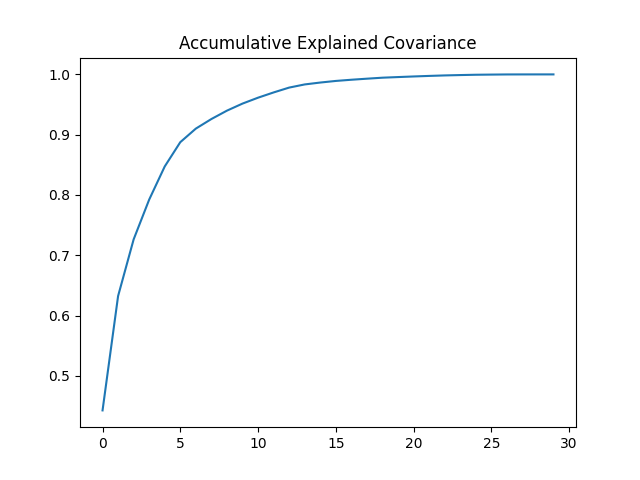

In [8]:
fig, ax = plt.subplots()
ax.plot(accum_explained_var)
ax.set_title("Accumulative Explained Covariance")
plt.show()

(569, 3)


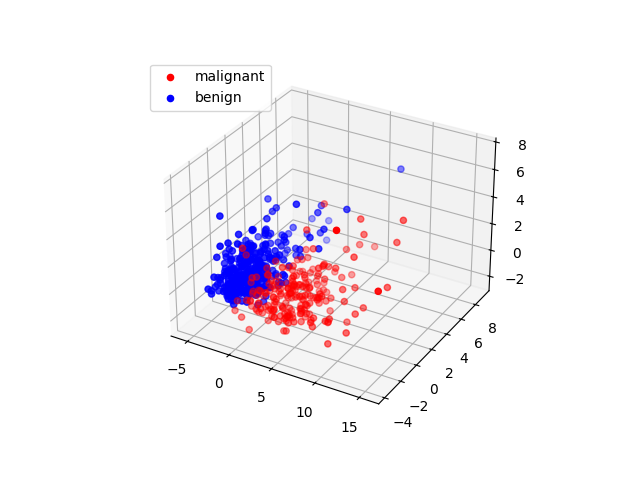

In [9]:
# plot the first 3 principal components
k = 3
R = np.matmul(X, sorted_eigenvectors[:, :k])
print(R.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R[:,0][y==0], R[:,1][y==0], R[:,2][y==0], c='r', label="malignant")
ax.scatter(R[:,0][y==1], R[:,1][y==1], R[:,2][y==1], c='b', label="benign")
ax.legend(loc="upper left")
plt.show()

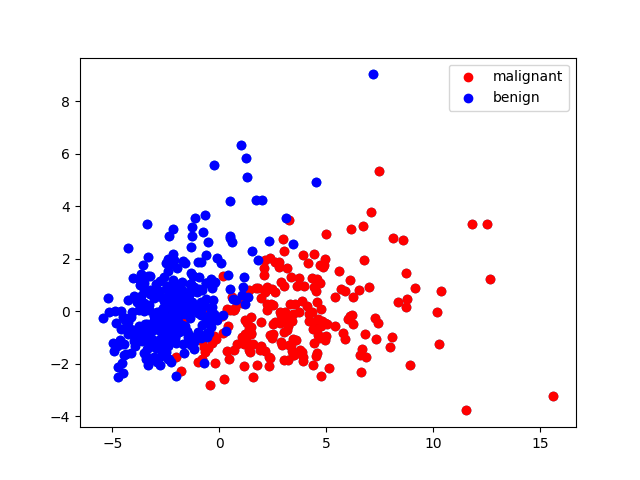

In [10]:
# 5. Dimension reduction
k = 2
R = np.matmul(X, sorted_eigenvectors[:, :k])
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(R[:,0], R[:,1])
ax.scatter(R[:,0][y==0], R[:,1][y==0], c='r', label="malignant")
ax.scatter(R[:,0][y==1], R[:,1][y==1], c='b', label="benign")
ax.legend(loc="upper right")
plt.show()

In the above analysis we see the first 3 principal components explain approx 72% of the variance within the data. 
Plotting the first 3 and 2 principal components respectively we see a separation between malignant and benign tumors. 
This suggess we can use the two 